In [72]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from celluloid import Camera
import trimesh
np.set_printoptions(precision=4, suppress=True, formatter={'float': '{:0.3e}'.format})

In [2]:
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [3]:
def MTHRotx(angulo):
    #Matriz de transformación homogenea, se usa la conversion de grados a radianes.
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(angulo), -np.sin(angulo), 0],
                     [0, np.sin(angulo), np.cos(angulo), 0],
                     [0, 0, 0, 1]])

def MTHRoty(angulo):
    #Matriz de transformación homogenea, se usa la conversion de grados a radianes.
    return np.array([[np.cos(angulo), 0, np.sin(angulo), 0],
                     [0, 1, 0, 0],
                     [-np.sin(angulo), 0, np.cos(angulo), 0],
                     [0, 0, 0, 1]])

def MTHRotz(angulo):
    #Matriz de transformación homogenea, se usa la conversion de grados a radianes.
    return np.array([[np.cos(angulo), -np.sin(angulo), 0, 0],
                     [np.sin(angulo), np.cos(angulo), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

In [4]:
def MTHtrasx(distancia):
    # Crear una matriz de transformación homogénea identidad 4x4
    MTH = np.eye(4)
    # Asignar la distancia a la posición en el eje x (fila 1, columna 4)
    MTH[0, 3] = distancia
    return MTH

def MTHtrasy(distancia):
    # Crear una matriz de transformación homogénea identidad 4x4
    MTH = np.eye(4)
    # Asignar la distancia a la posición en el eje x (fila 1, columna 4)
    MTH[1, 3] = distancia
    return MTH

def MTHtrasz(distancia):
    # Crear una matriz de transformación homogénea identidad 4x4
    MTH = np.eye(4)
    # Asignar la distancia a la posición en el eje x (fila 1, columna 4)
    MTH[2, 3] = distancia
    return MTH

In [15]:
def dibujar_sistema_referencia_MTH(MTH, L, subindice, ax=None):
    #Esta funcion grafica un sistema de referencia a partir de una matriz de transformacion homogenea.
    
    #Puntos finales de los ejes x, y, z
    pfx = MTH @ np.array([[L], [0], [0], [1]])
    pfy = MTH @ np.array([[0], [L], [0], [1]])
    pfz = MTH @ np.array([[0], [0], [L], [1]])
    
    #Origen
    origen = np.array([MTH[0, 3], MTH[1, 3], MTH[2, 3]])
    
    #Crear figura y objeto de eje si no se proporciona uno
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        

    #Dibujar los ejes
    #ax.arrow3D(origen[0], origen[1], origen[2], pfx[0, 0], pfx[1, 0], pfx[2, 0], mutation_scale=100, arrowstyle="-", linestyle='solid', color='red')
    #ax.arrow3D(origen[0], origen[1], origen[2], pfy[0, 0], pfy[1, 0], pfy[2, 0], mutation_scale=100, arrowstyle="-", linestyle='solid', color='green')
    #ax.arrow3D(origen[0], origen[1], origen[2], pfz[0, 0], pfz[1, 0], pfz[2, 0], mutation_scale=100, arrowstyle="-", linestyle='solid', color='blue')
    ax.plot([origen[0] ,pfx[0, 0]],[origen[1],pfx[1, 0]],[origen[2],pfx[2, 0]], color = 'r')
    ax.plot([origen[0] ,pfy[0, 0]],[origen[1],pfy[1, 0]],[origen[2],pfy[2, 0]], color = 'g')
    ax.plot([origen[0] ,pfz[0, 0]],[origen[1],pfz[1, 0]],[origen[2],pfz[2, 0]], color = 'b')
    
    #Agregar texto al final de los ejes
    subindicex = 'x'+subindice
    subindicey = 'y'+subindice
    subindicez = 'z'+subindice

    ax.annotate3D(subindicex, (pfx[0, 0], pfx[1, 0], pfx[2, 0]), xytext=(3, 3), textcoords='offset points')
    ax.annotate3D(subindicey, (pfy[0, 0], pfy[1, 0], pfy[2, 0]), xytext=(3, 3), textcoords='offset points')
    ax.annotate3D(subindicez, (pfz[0, 0], pfz[1, 0], pfz[2, 0]), xytext=(3, 3), textcoords='offset points')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.grid(True)

In [5]:
def Denavit_Hartenberg(theta, d, a, alfa):  #Esta funcion calcula la matriz denavit hartenberg
    DH = np.array([[np.cos(theta), -np.cos(alfa)*np.sin(theta),  np.sin(alfa)*np.sin(theta), a*np.cos(theta)],
                   [np.sin(theta),  np.cos(alfa)*np.cos(theta), -np.sin(alfa)*np.cos(theta), a*np.sin(theta)],
                   [0, np.sin(alfa), np.cos(alfa), d],
                   [0, 0, 0, 1]])
    return DH

# Probando Funcion Denavit_hartenber

In [6]:
#Variable articular

q = np.array([0, 0, 0, 0])


# Dimensiones del Robot
#Las dimenciones se han dividido entre 100.
L1=135.5;
L2=120.23;
L3=94.6;
L4=65;

# Tabla de parametros D_H
theta_DH = np.array([(q[0]+np.pi/2),      q[1],     q[2],    q[3]]);
d_DH     = np.array([L1,    0,        0,           0]);
a_DH     = np.array([0,         L2,       L3,              L4]);
alpha_DH = np.array([np.pi/2,         0,       0,             0]);

A01 = Denavit_Hartenberg(theta_DH[0], d_DH[0], a_DH[0], alpha_DH[0]);

A01

array([[6.123e-17, -6.123e-17, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.749e-33, -6.123e-17, 0.000e+00],
       [0.000e+00, 1.000e+00, 6.123e-17, 1.355e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]])

Ahora que sabemos que si funciona la funcion anterior, procedemos a realizar a
para calcular la cinematica directa del robot

# Cinematica directa raplim

La función a continuación devuelve la posicion final y orientación de cada una de las sistemas de referencias del robot,
es decir A00, A01, A02, A03 y A04. La mas importante A04, pues nos da información de la posición y orientación del efector final

In [10]:
def DK_Raplim(q): #El parametro es el valor de las variables articulares.
    # Dimensiones del Robot
    #Las dimenciones se han dividido entre 100.
    L1=135.5;
    L2=120.23;
    L3=94.6;
    L4=65;

    # Tabla de parametros D_H
    theta_DH = np.array([(q[0]+np.pi/2),      q[1],     q[2],    q[3]]);
    d_DH     = np.array([L1,    0,        0,           0]);
    a_DH     = np.array([0,         L2,       L3,              L4]);
    alpha_DH = np.array([np.pi/2,         0,       0,             0]);

    #Matrix de transformación homogenea que representa el origen, en caso que el origen del robot no sea el punto 0,0,0,
    #es decir que este anclado a la pared se debe realizar una transormación para mover el orige, en este caso basta con la
    #siguiuente linea.
    A00 = np.eye(4)
    
    #Calcular las matricces de transformacion homogenea, con DH
    A01 = Denavit_Hartenberg(theta_DH[0], d_DH[0], a_DH[0], alpha_DH[0]);
    A12 = Denavit_Hartenberg(theta_DH[1], d_DH[1], a_DH[1], alpha_DH[1]);
    A23 = Denavit_Hartenberg(theta_DH[2], d_DH[2], a_DH[2], alpha_DH[2]);
    A34 = Denavit_Hartenberg(theta_DH[3], d_DH[3], a_DH[3], alpha_DH[3]);
    
    #Calcula matrices de transformación homogenea respecto al origen.
    A02 = A01@A12;
    A03 = A02@A23;
    A04 = A03@A34;
    
    
    #Retornar todas las matrices en una matriz de 3 dimension 5X4X4
    
    # Definir la dimensión de la matriz de matrices
    n = 4  # número de matrices

    # Crear la matriz de matrices
    A = np.zeros((5, 4, 4))  # matriz de 5x4x4

    # Llenar la matriz de matrices con las matrices de transformación homogénea
    A[0, :, :] = A00
    A[1, :, :] = A01
    A[2, :, :] = A02
    A[3, :, :] = A03
    A[4, :, :] = A04
    
    return A
    

### Probando función

In [55]:
#Variable articular

q = np.array([0, 0, 0, 0])

#Calcular cinemática direccta
A = DK_Raplim(q)
A # A es una matriz 5X4X4 que tiene todas la matrices con respecto al origen y el origen.

array([[[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]],

       [[6.123e-17, -6.123e-17, 1.000e+00, 0.000e+00],
        [1.000e+00, 3.749e-33, -6.123e-17, 0.000e+00],
        [0.000e+00, 1.000e+00, 6.123e-17, 1.355e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]],

       [[6.123e-17, -6.123e-17, 1.000e+00, 7.362e-15],
        [1.000e+00, 3.749e-33, -6.123e-17, 1.202e+02],
        [0.000e+00, 1.000e+00, 6.123e-17, 1.355e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]],

       [[6.123e-17, -6.123e-17, 1.000e+00, 1.315e-14],
        [1.000e+00, 3.749e-33, -6.123e-17, 2.148e+02],
        [0.000e+00, 1.000e+00, 6.123e-17, 1.355e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]],

       [[6.123e-17, -6.123e-17, 1.000e+00, 1.713e-14],
        [1.000e+00, 3.749e-33, -6.123e-17, 2.798e+02],
        [0.0

Ya que sabemos que la cinematica directa funciona, implementaremos una función para dibujar el robot en alambres, luego la modificaremos para dibujar el robot con trimesh

## Dibujar raplim en alambres

In [56]:
def dibujar_robot_alambres(A, L, ax):
    #Esta función grafica en almabre un robot de 4gdl
    
    #Crear figura y objeto de eje si no se proporciona uno
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    dibujar_sistema_referencia_MTH(A[0,:,:], L, '0', ax)
    dibujar_sistema_referencia_MTH(A[1,:,:], L, '1', ax)
    dibujar_sistema_referencia_MTH(A[2,:,:], L, '2', ax)
    dibujar_sistema_referencia_MTH(A[3,:,:], L, '3', ax)
    dibujar_sistema_referencia_MTH(A[4,:,:], L, '4', ax)

    P00 = A[0,:,3][:3] # Selecciona las tres primeras filas de la ultima columna de matriz 0
    P01 = A[1,:,3][:3]
    P02 = A[2,:,3][:3]
    P03 = A[3,:,3][:3]
    P04 = A[4,:,3][:3]

    #Dibujar eslabones en color negro

    ax.plot([P00[0] ,P01[0]],[P00[1],P01[1]],[P00[2],P01[2]], color = 'black')
    ax.plot([P01[0] ,P02[0]],[P01[1],P02[1]],[P01[2],P02[2]], color = 'black')
    ax.plot([P02[0] ,P03[0]],[P02[1],P03[1]],[P02[2],P03[2]], color = 'black')
    ax.plot([P03[0] ,P04[0]],[P03[1],P04[1]],[P03[2],P04[2]], color = 'black')

    # Ajustar escala de los ejes
    #ax.set_box_aspect([1,1,1])

<IPython.core.display.Javascript object>


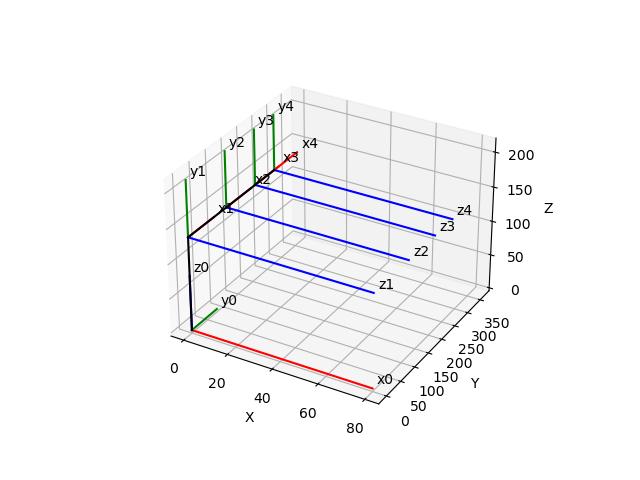

<function matplotlib.pyplot.show(*, block=None)>

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dibujar_robot_alambres(A, 80, ax)
plt.show

### Ahora hagamos una animación del robot sin tener en cuenta la cinematica inversa.

In [108]:
def Animarmov(q_inicial, q_final):
    #q_inicial = np.array([0, 0, 0, 0])
    #q_final = np.array([np.pi, np.pi/2, np.pi/4, np.pi/8])
    #Esta funcion anima un robot sin tener en cuenta la cinematica inversa.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(20, -70)
    ax.set_xlim(-200,200)
    ax.set_ylim(-200,200)
    ax.set_zlim(0,400)
    ax.set_box_aspect([1,1,1])

    camera = Camera(fig) #Importante  decirle a Camera que figura es la que se va a animar

    movimiento1 = np.linspace(q_inicial[0], q_final[0], num=20)  #Guardar los valores de las variables articulares
    movimiento2 = np.linspace(q_inicial[1], q_final[1], num=20)
    movimiento3 = np.linspace(q_inicial[2], q_final[2], num=20)
    movimiento4 = np.linspace(q_inicial[3], q_final[3], num=20)

    for i in np.arange(20):
        q = np.array([movimiento1[i],movimiento2[i],movimiento3[i],movimiento4[i]])
        #Calcular cinemática direccta
        A = DK_Raplim(q)
        #Dibujar el robot en alambres en función de la cinemática directa
        dibujar_robot_alambres(A, 80, ax)
        camera.snap()

    return camera

<IPython.core.display.Javascript object>


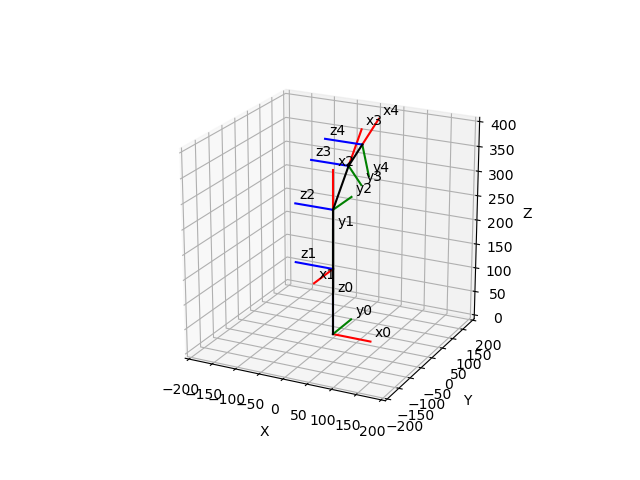

In [112]:
q_inicial = np.array([0, 0, 0, 0])
q_final = np.array([np.pi, np.pi/2, np.pi/4, np.pi/8])
camera = Animarmov(q_inicial, q_final)
#Animar
animation = camera.animate(interval=500, blit = True, repeat=False)  # Crear la animación a partir de las imágenes almacenadas en la cámara. Blit muestra solo las graficas que han cambiado para acelerar la animacción

plt.show()

### Ahora que ya tenemos la cinematica directa, el robot dibujado en alambres, Podemos dibujar el robot usando STL

<IPython.core.display.Javascript object>


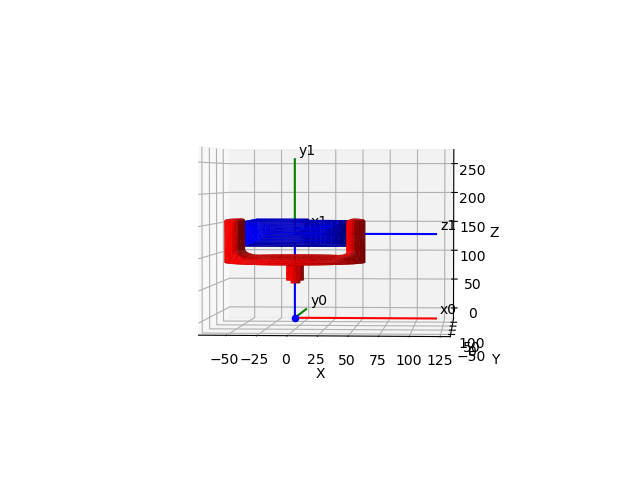

In [173]:
#Variable articular

q = np.array([0, 0, 0, 0])

#Calcular cinemática direccta
A = DK_Raplim(q)

# Cargar las mallas desde un archivo STL
base = trimesh.load_mesh('Raplim/stl_eslabon0.stl').simplify_quadric_decimation(9000) #Disminuye el numero de caras a 9000
eslabon1 = trimesh.load_mesh('Raplim/stl_eslabon1.stl').simplify_quadric_decimation(7000)
eslabon2 = trimesh.load_mesh('Raplim/stl_eslabon2.stl')


# Establece la opacidad del material
#base.visual.face_colors = [255, 255, 255, 128]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Aplicar transformaciones, para graficar el objeto en función de la matriz de transformación homogenea
# Aplicar transformación al eslabón 1
eslabon1.apply_transform(MTHtrasz(135.5))
eslabon2.apply_transform(A[1,:,:])

ax.scatter(0, 0, 0, c='blue')
# Agregar mallas al gráfico
#ax.plot_trisurf(base.vertices[:, 0], base.vertices[:, 1], base.vertices[:, 2], triangles=base.faces, color='gray')
ax.plot_trisurf(eslabon1.vertices[:, 0], eslabon1.vertices[:, 1], eslabon1.vertices[:, 2], triangles=eslabon1.faces, color='red')
ax.plot_trisurf(eslabon2.vertices[:, 0], eslabon2.vertices[:, 1], eslabon2.vertices[:, 2], triangles=eslabon2.faces, color='blue')


# Dibujar sistemas de referencia
dibujar_sistema_referencia_MTH(A[0,:,:], 120, '0', ax)
dibujar_sistema_referencia_MTH(A[1,:,:], 120, '1', ax)

plt.show()

Matplotlib tiene este inconveniente ya que, es posible que algunas partes de los objetos se oculten detrás de otras partes. Esto puede ocurrir por una variedad de razones, como el orden en que se agregan los objetos al gráfico o la orientación de la cámara.

In [134]:
import sys
print(sys.version)


3.9.16 (main, Mar  1 2023, 18:30:21) [MSC v.1916 64 bit (AMD64)]
